In [2]:
import pandas as pd

In [4]:
# leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [5]:
# concatenando os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
# pega amostras
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
173,Natal,2019-01-02,31.77,1034,2
96,Fortaleza,2019-01-01,23.31,1004,4
33,Fortaleza,2019-01-01,19.56,1005,1
165,Salvador,2019-01-02,11.54,1037,1
88,Fortaleza,2019-01-01,68.60,1004,6


In [9]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
# alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [11]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

**Tratando valores faltantes**

In [12]:
# consultando se há linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [13]:
# substituindo valores nulos pela média
# inplace: modifica o objeto em memória
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [14]:
# substituindo valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [15]:
# apagando linhas com valores nulos
df.dropna(inplace=True)

In [16]:
# apagando linhas com valores nulos com base em 1 coluna
df.dropna(subset=["Vendas"], inplace=True)

In [17]:
# removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

**criando colunas novas**

In [18]:
# criando a coluna receita. vendas * quantidade
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [19]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [20]:
# retornando a maior receita
df["Receita"].max()

3544.0

In [21]:
# retornando a menor receita
df["Receita"].min()

3.34

In [22]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [23]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [24]:
# nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [25]:
# nsmallest - top 3 com base na coluna receita
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [26]:
# agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [27]:
# organizando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


**trabalhando com datas**

In [28]:
# transformando a coluna de data em int
df["Data"] = df["Data"].astype("int64")

In [29]:
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [30]:
# transformando a coluna em date
df["Data"] = pd.to_datetime(df["Data"])

In [31]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [32]:
# agrupamento por ano, receita por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [33]:
# criano nova coluna com o ano
df["ano_venda"] = df["Data"].dt.year

In [34]:
# extraindo o mês e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [35]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,ano_venda,mes_venda,dia_venda
102,Salvador,2019-01-01,40.84,1034,3,122.52,3.0,2019,1,1
94,Recife,2019-01-01,24.70,982,3,74.10,3.0,2019,1,1
208,Natal,2019-01-02,39.40,1036,3,118.20,3.0,2019,1,2
33,Aracaju,2018-01-01,35.09,1523,4,140.36,4.0,2018,1,1
78,Natal,2019-02-07,310.00,853,4,1240.00,4.0,2019,2,7


In [36]:
# data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [37]:
# calculando a diferença de dias
df["diferenca_dias"] = df["Data"] - df["Data"].min()

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,ano_venda,mes_venda,dia_venda,diferenca_dias
93,Fortaleza,2019-01-01,35.25,1003,5,176.25,5.0,2019,1,1,365 days
71,Aracaju,2018-01-01,228.27,1523,6,1369.62,6.0,2018,1,1,0 days
98,Recife,2019-01-01,137.34,981,8,1098.72,8.0,2019,1,1,365 days
144,Natal,2019-01-02,23.38,1034,1,23.38,1.0,2019,1,2,366 days
46,Aracaju,2018-01-01,41.42,1522,2,82.84,2.0,2018,1,1,0 days


In [39]:
# criando a coluna de trimestre
df["trimestre_venda"] = df["Data"].dt.quarter

In [40]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
162,Salvador,2019-01-02,23.08,1036,2,46.16,2.0,2019,1,2,366 days,1
54,Aracaju,2018-01-01,20.85,1523,1,20.85,1.0,2018,1,1,0 days,1
75,Salvador,2019-01-01,155.52,1034,1,155.52,1.0,2019,1,1,365 days,1
171,Natal,2019-01-02,136.45,1035,3,409.35,3.0,2019,1,2,366 days,1
96,Natal,2019-01-02,42.94,1034,3,128.82,3.0,2019,1,2,366 days,1


In [41]:
# filtrando vendas de março de 2019
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [42]:
vendas_marco_19.sample(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,ano_venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
132,Recife,2019-03-02,17.49,983,5,87.45,5.0,2019,3,2,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
140,Fortaleza,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,2,425 days,1
117,Recife,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2.0,2019,3,2,425 days,1
120,Recife,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2,425 days,1
82,Natal,2019-03-07,868.00,854,3,2604.00,3.0,2019,3,7,430 days,1
46,Natal,2019-03-26,753.00,853,2,1506.00,2.0,2019,3,26,449 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,4.0,2019,3,27,450 days,1


**visualização de dados**

In [43]:
# numero da loja e quantidade de linhas com essa loja
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

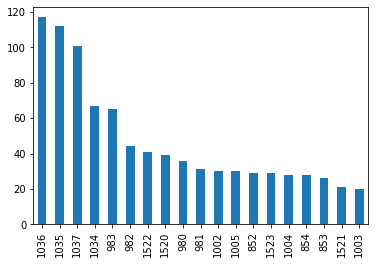

In [44]:
# gráfico de barras verticais
df["LojaID"].value_counts(ascending=False).plot.bar()

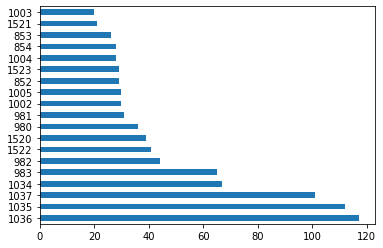

In [45]:
# gráfico de barras horizontais -- ; no final é pra não mostrar linha adicional
df["LojaID"].value_counts(ascending=False).plot.barh();

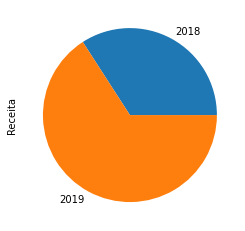

In [46]:
# gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [47]:
# total de vendas por cidade
df["Cidade"].value_counts()

Salvador     240
Natal        240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

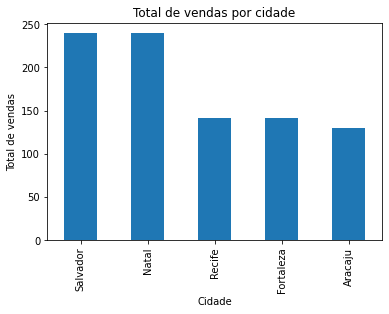

In [48]:
# adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title= "Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

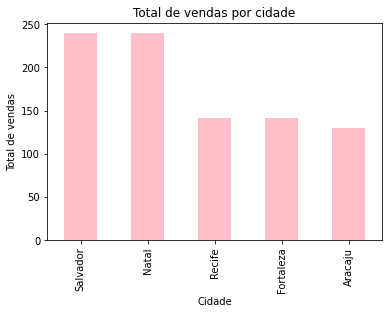

In [49]:
# alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="pink")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [50]:
# alterando o estilo - consultar documentação matplotlib
plt.style.use("ggplot")

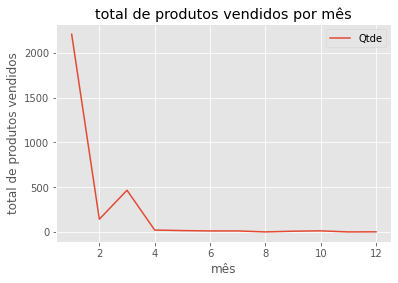

In [51]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "total de produtos vendidos por mês")
plt.xlabel("mês")
plt.ylabel("total de produtos vendidos")
plt.legend();

In [52]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [53]:
# selecionando apenas as vendas de 2019
df_2019 = df[df["ano_venda"] == 2019]

In [54]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

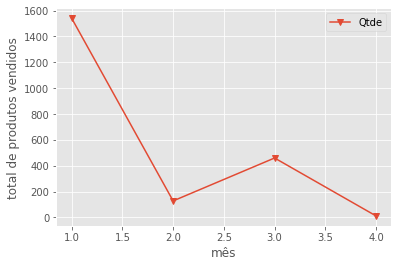

In [55]:
# total de produtos vendidos por mês
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("mês")
plt.ylabel("total de produtos vendidos")
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

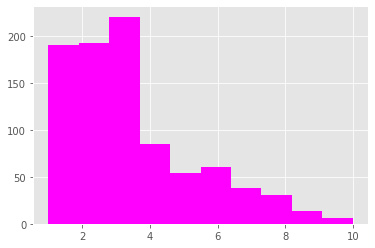

In [56]:
# histograma
plt.hist(df["Qtde"], color="magenta")

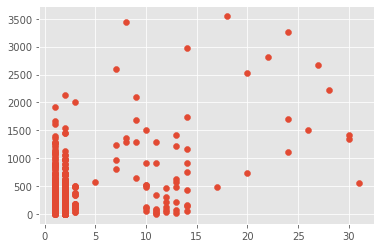

In [57]:
# gráfico de dispersão
plt.scatter(x=df_2019["dia_venda"], y=df_2019["Receita"]);

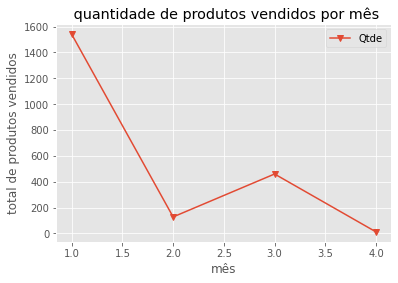

In [58]:
# salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title(" quantidade de produtos vendidos por mês")
plt.xlabel("mês")
plt.ylabel("total de produtos vendidos")
plt.legend()
plt.savefig("gráfico qtde x mês.png")